# Import Packages 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Import Data

In [2]:
df= pd.read_csv("./assets/2016_School_Explorer.csv")

# Data Cleaning

In [3]:
# df.head()

In [4]:
# df.dtypes

In [5]:
df.isnull().sum().sum()

5054

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Columns: 161 entries, Adjusted Grade to Grade 8 Math 4s - Economically Disadvantaged
dtypes: float64(5), int64(123), object(33)
memory usage: 1.6+ MB


In [7]:
df.describe()

,SED Code,District,Latitude,Longitude,Zip,Economic Need Index,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
count,1.272000e+03,1272.00000,1272.000000,1272.000000,1272.000000,1247.000000,1217.000000,1217.000000,1272.000000,1272.000000,...,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,3.286698e+11,16.13522,40.734537,-73.918347,10815.720912,0.672281,2.534215,2.668956,60.569182,4.952830,...,43.841195,4.911950,0.003145,0.610063,0.947327,1.984277,0.970912,0.002358,0.159591,2.992138
std,1.222022e+10,9.24527,0.086602,0.080576,529.588875,0.210959,0.363589,0.470470,57.872496,8.300568,...,82.878780,20.792371,0.068635,3.966083,4.056007,12.841333,6.880223,0.084116,1.321195,12.694124
min,3.075000e+11,1.00000,40.507803,-74.244025,10001.000000,0.049000,1.810000,1.830000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.208752e+11,9.00000,40.669499,-73.957057,10452.000000,0.550000,2.250000,2.300000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.315004e+11,15.00000,40.722995,-73.920571,11203.000000,0.731000,2.450000,2.580000,54.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.424000e+11,24.00000,40.815632,-73.879264,11232.000000,0.841000,2.760000,2.980000,94.000000,7.000000,...,59.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.531009e+11,32.00000,40.903455,-73.708920,11694.000000,0.957000,3.930000,4.200000,356.000000,55.000000,...,652.000000,312.000000,2.000000,107.000000,71.000000,246.000000,126.000000,3.000000,33.000000,196.000000


In [8]:
df.columns

Index(['Adjusted Grade', 'New?', 'Other Location Code in LCGMS', 'School Name',
       'SED Code', 'Location Code', 'District', 'Latitude', 'Longitude',
       'Address (Full)',
       ...
       'Grade 8 Math - All Students Tested', 'Grade 8 Math 4s - All Students',
       'Grade 8 Math 4s - American Indian or Alaska Native',
       'Grade 8 Math 4s - Black or African American',
       'Grade 8 Math 4s - Hispanic or Latino',
       'Grade 8 Math 4s - Asian or Pacific Islander',
       'Grade 8 Math 4s - White', 'Grade 8 Math 4s - Multiracial',
       'Grade 8 Math 4s - Limited English Proficient',
       'Grade 8 Math 4s - Economically Disadvantaged'],
      dtype='object', length=161)

**Adjusted Grade, New, and Other Location Code in LCGMS are all empty, so I'm going to go ahead
and drop those**

In [9]:
df.drop(['Adjusted Grade','New?','Other Location Code in LCGMS'], axis=1,inplace=True)

In [10]:
# Convert Percentage Columns that are objects into floats

In [11]:
df_withpercent=df.filter(like='%')

In [12]:
df_withpercent = df_withpercent.apply(lambda x: x.str.replace("%", ""))

In [13]:
df_withpercent.apply(lambda x: x.str.replace("%", ""))

,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
0,89,94,86,91,85,94
1,96,96,97,90,86,94
2,87,77,82,61,80,79
3,85,78,82,73,89,88
4,90,88,87,81,89,93
5,93,99,95,91,88,97
6,88,78,95,69,87,78
7,87,89,88,88,79,94
8,94,91,85,87,83,93
9,92,89,90,83,89,95


In [14]:
df_withpercent=df_withpercent.apply(lambda x: x.astype(float)*.01)

In [15]:
df_withpercent.columns

Index(['Rigorous Instruction %', 'Collaborative Teachers %',
       'Supportive Environment %', 'Effective School Leadership %',
       'Strong Family-Community Ties %', 'Trust %'],
      dtype='object')

In [16]:
# Replace columns in the original dataframe with edited columns 

In [17]:
columns_to_overwrite = ['Rigorous Instruction %', 'Collaborative Teachers %',
       'Supportive Environment %', 'Effective School Leadership %',
       'Strong Family-Community Ties %', 'Trust %']


In [18]:
df.drop(labels=columns_to_overwrite, axis="columns", inplace=True)

In [19]:
df[columns_to_overwrite] = df_withpercent[columns_to_overwrite]


In [20]:
df.select_dtypes('object').columns

Index(['School Name', 'Location Code', 'Address (Full)', 'City', 'Grades',
       'Grade Low', 'Grade High', 'Community School?',
       'School Income Estimate', 'Percent ELL', 'Percent Asian',
       'Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic',
       'Percent White', 'Student Attendance Rate',
       'Percent of Students Chronically Absent', 'Rigorous Instruction Rating',
       'Collaborative Teachers Rating', 'Supportive Environment Rating',
       'Effective School Leadership Rating',
       'Strong Family-Community Ties Rating', 'Trust Rating',
       'Student Achievement Rating'],
      dtype='object')

In [21]:
df.select_dtypes('float64').columns

Index(['Latitude', 'Longitude', 'Economic Need Index',
       'Average ELA Proficiency', 'Average Math Proficiency',
       'Rigorous Instruction %', 'Collaborative Teachers %',
       'Supportive Environment %', 'Effective School Leadership %',
       'Strong Family-Community Ties %', 'Trust %'],
      dtype='object')

In [22]:
df.select_dtypes('int64').columns

Index(['SED Code', 'District', 'Zip', 'Grade 3 ELA - All Students Tested',
       'Grade 3 ELA 4s - All Students',
       'Grade 3 ELA 4s - American Indian or Alaska Native',
       'Grade 3 ELA 4s - Black or African American',
       'Grade 3 ELA 4s - Hispanic or Latino',
       'Grade 3 ELA 4s - Asian or Pacific Islander', 'Grade 3 ELA 4s - White',
       ...
       'Grade 8 Math - All Students Tested', 'Grade 8 Math 4s - All Students',
       'Grade 8 Math 4s - American Indian or Alaska Native',
       'Grade 8 Math 4s - Black or African American',
       'Grade 8 Math 4s - Hispanic or Latino',
       'Grade 8 Math 4s - Asian or Pacific Islander',
       'Grade 8 Math 4s - White', 'Grade 8 Math 4s - Multiracial',
       'Grade 8 Math 4s - Limited English Proficient',
       'Grade 8 Math 4s - Economically Disadvantaged'],
      dtype='object', length=123)

In [23]:
df_withpercent.dtypes

Rigorous Instruction %            float64
Collaborative Teachers %          float64
Supportive Environment %          float64
Effective School Leadership %     float64
Strong Family-Community Ties %    float64
Trust %                           float64
dtype: object

In [24]:
df_percents=df[['Percent Asian','Percent ELL', 'Percent Black', 'Student Attendance Rate',
                'Percent Black / Hispanic','Percent White', 
                'Percent of Students Chronically Absent',
                'Percent Hispanic']]
               

In [25]:
df_percents=df_percents.apply(lambda x: x.str.replace("%", ""))

In [26]:
df_percents=df_percents.apply(lambda x: x.astype(float)*.01)

In [27]:
columns_to_ow= ['Percent Asian','Percent ELL', 'Percent Black', 
                'Student Attendance Rate','Percent Black / Hispanic','Percent White',
                'Percent of Students Chronically Absent', 'Percent Hispanic']

In [28]:
df.drop(labels=columns_to_ow, axis="columns", inplace=True)

In [29]:
df[columns_to_ow] = df_percents[columns_to_ow]


In [30]:
(list(df.columns.values))

['School Name',
 'SED Code',
 'Location Code',
 'District',
 'Latitude',
 'Longitude',
 'Address (Full)',
 'City',
 'Zip',
 'Grades',
 'Grade Low',
 'Grade High',
 'Community School?',
 'Economic Need Index',
 'School Income Estimate',
 'Rigorous Instruction Rating',
 'Collaborative Teachers Rating',
 'Supportive Environment Rating',
 'Effective School Leadership Rating',
 'Strong Family-Community Ties Rating',
 'Trust Rating',
 'Student Achievement Rating',
 'Average ELA Proficiency',
 'Average Math Proficiency',
 'Grade 3 ELA - All Students Tested',
 'Grade 3 ELA 4s - All Students',
 'Grade 3 ELA 4s - American Indian or Alaska Native',
 'Grade 3 ELA 4s - Black or African American',
 'Grade 3 ELA 4s - Hispanic or Latino',
 'Grade 3 ELA 4s - Asian or Pacific Islander',
 'Grade 3 ELA 4s - White',
 'Grade 3 ELA 4s - Multiracial',
 'Grade 3 ELA 4s - Limited English Proficient',
 'Grade 3 ELA 4s - Economically Disadvantaged',
 'Grade 3 Math - All Students tested',
 'Grade 3 Math 4s - All S

In [31]:
df.select_dtypes('object').columns

Index(['School Name', 'Location Code', 'Address (Full)', 'City', 'Grades',
       'Grade Low', 'Grade High', 'Community School?',
       'School Income Estimate', 'Rigorous Instruction Rating',
       'Collaborative Teachers Rating', 'Supportive Environment Rating',
       'Effective School Leadership Rating',
       'Strong Family-Community Ties Rating', 'Trust Rating',
       'Student Achievement Rating'],
      dtype='object')

In [32]:
# SED Code seems irrelevant given all of the other more detailed address columns so will drop

In [33]:
df.drop(['SED Code'],axis=1,inplace=True)

In [34]:
df.isnull().sum().sort_values(ascending=False)
# Interestingly enough, many have exactly 25 missing values so I'll further explore those

School Income Estimate                                396
Student Achievement Rating                             86
Supportive Environment Rating                          80
Rigorous Instruction Rating                            76
Collaborative Teachers Rating                          76
Strong Family-Community Ties Rating                    73
Trust Rating                                           73
Effective School Leadership Rating                     73
Average ELA Proficiency                                55
Average Math Proficiency                               55
Trust %                                                25
Strong Family-Community Ties %                         25
Effective School Leadership %                          25
Collaborative Teachers %                               25
Rigorous Instruction %                                 25
Percent of Students Chronically Absent                 25
Student Attendance Rate                                25
Economic Need 

In [35]:
df.duplicated().sum()
# No duplicates 

0

In [36]:
#First drop na 
df.dropna(inplace=True)

In [37]:
df.describe()

,District,Latitude,Longitude,Zip,Economic Need Index,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,...,Strong Family-Community Ties %,Trust %,Percent Asian,Percent ELL,Percent Black,Student Attendance Rate,Percent Black / Hispanic,Percent White,Percent of Students Chronically Absent,Percent Hispanic
count,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,...,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000
mean,16.794969,40.728965,-73.918764,10838.373585,0.663708,2.552591,2.731258,89.396226,7.153459,0.015094,...,0.849270,0.906465,0.125774,0.128704,0.302352,0.929698,0.700428,0.151585,0.214692,0.398151
std,9.327351,0.087233,0.084969,528.306779,0.224411,0.350060,0.445571,50.945743,9.206919,0.187180,...,0.044834,0.057869,0.184061,0.109281,0.292128,0.077670,0.306784,0.216933,0.135662,0.259604
min,1.000000,40.508835,-74.244025,10001.000000,0.059000,1.970000,1.900000,0.000000,0.000000,0.000000,...,0.720000,0.620000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.020000
25%,9.000000,40.665664,-73.960053,10453.000000,0.534000,2.270000,2.360000,52.000000,1.000000,0.000000,...,0.820000,0.880000,0.010000,0.040000,0.050000,0.920000,0.410000,0.010000,0.110000,0.170000
50%,17.000000,40.716096,-73.921465,11205.000000,0.730000,2.480000,2.650000,82.000000,3.000000,0.000000,...,0.840000,0.920000,0.040000,0.100000,0.200000,0.940000,0.880000,0.030000,0.190000,0.340000
75%,25.000000,40.809439,-73.875590,11233.000000,0.849000,2.785000,3.040000,113.000000,10.000000,0.000000,...,0.880000,0.950000,0.160000,0.180000,0.540000,0.950000,0.960000,0.230000,0.300000,0.625000
max,32.000000,40.903455,-73.708920,11694.000000,0.957000,3.930000,4.150000,356.000000,55.000000,3.000000,...,0.990000,1.000000,0.950000,0.660000,0.970000,1.000000,0.990000,0.920000,1.000000,0.980000


In [38]:
# We can now drop Grade High and Low because they are irrelevant 

df.drop(['Grade Low', 'Grade High'],axis=1, inplace=True)

In [39]:
df['Community School?']= pd.get_dummies(df['Community School?'],drop_first=True)

In [40]:
df.select_dtypes('object').columns

Index(['School Name', 'Location Code', 'Address (Full)', 'City', 'Grades',
       'School Income Estimate', 'Rigorous Instruction Rating',
       'Collaborative Teachers Rating', 'Supportive Environment Rating',
       'Effective School Leadership Rating',
       'Strong Family-Community Ties Rating', 'Trust Rating',
       'Student Achievement Rating'],
      dtype='object')

# Investigating Data

In [41]:
# How many schools are community schools?
pd.DataFrame(df['Community School?'].value_counts().values,
                  index=df['Community School?'].value_counts().index, 
                  columns=[' '])

,
0,767
1,28



# GRAPHS

**Economic Need Index by City**

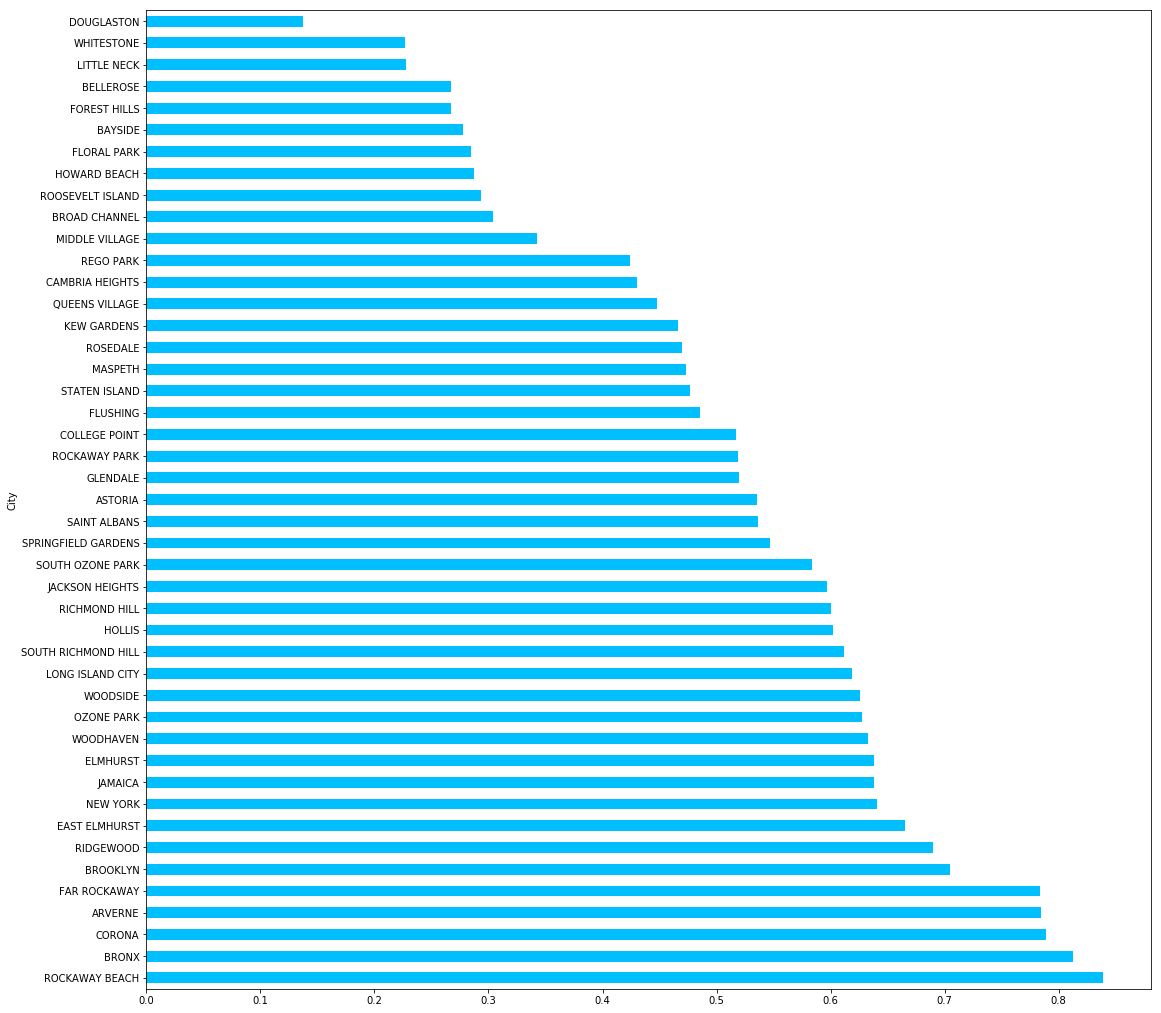

In [42]:
temp=df.groupby('City')['Economic Need Index'].mean()
temp.sort_values(ascending=False).plot(kind='barh',figsize=(18,18),color='deepskyblue')
plt.style.use('presentation');

**A more high-level look into Economic Index by City**

In [43]:
df['City1'] = [value if value in df['City'].value_counts().index[:4] else 'Other' for value in df['City']]

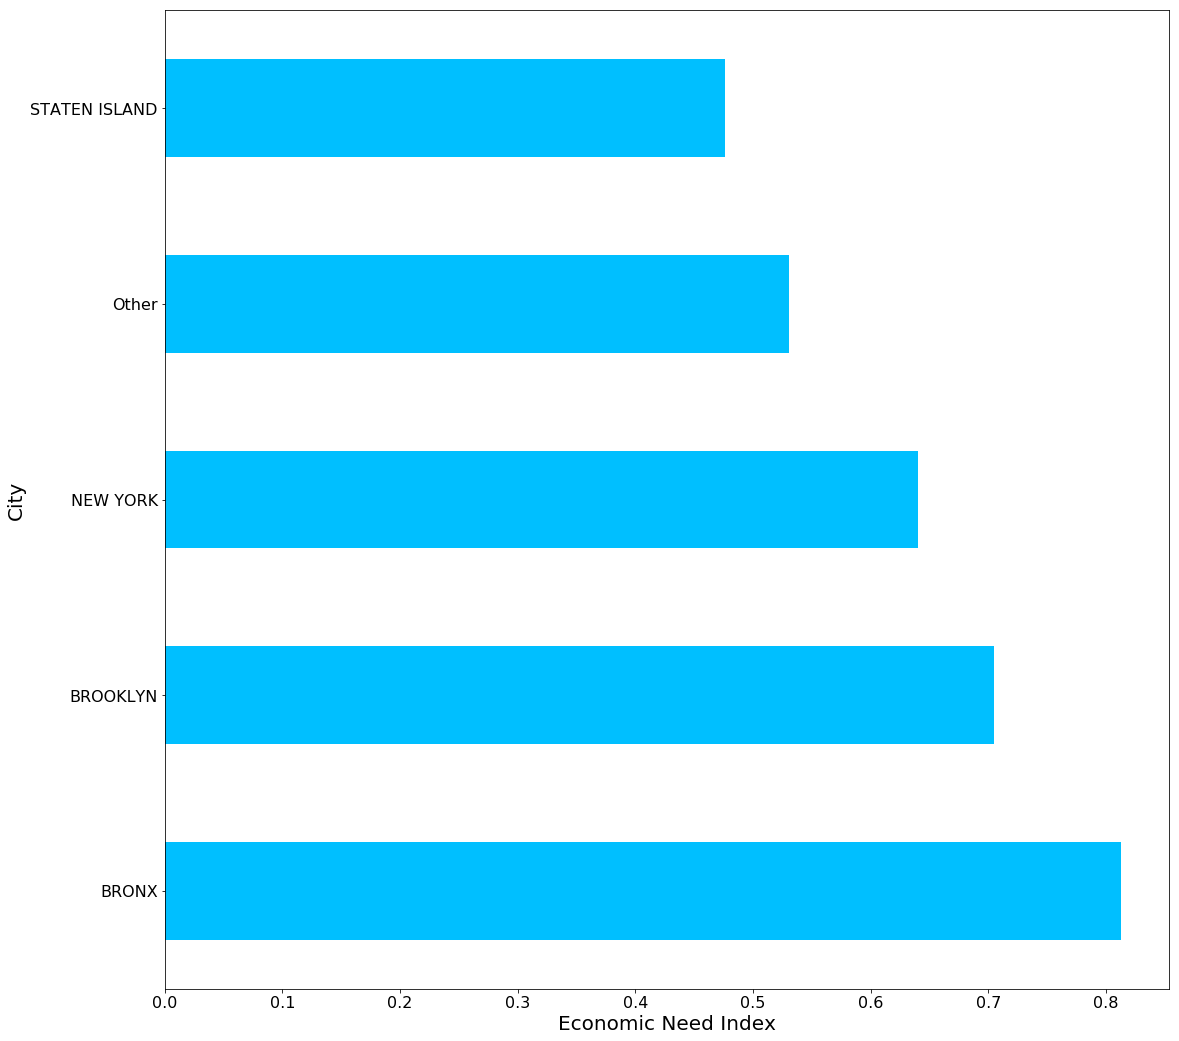

In [44]:
temp2=df.groupby('City1')['Economic Need Index'].mean()
temp2.sort_values(ascending=False).plot(kind='barh',figsize=(18,18),color='deepskyblue')
plt.style.use('presentation')
plt.xlabel('Economic Need Index')
plt.ylabel('City');

# Heatmaps

In [45]:
!pip install folium

You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [46]:
import folium

In [47]:
map_ = folium.Map(location=[40.721834,-73.9787660])

# state_geo=open('nyc-boroughs.geojson').read()
state_geo="https://raw.githubusercontent.com/sryza/aas/master/ch08-geotime/src/main/resources/nyc-boroughs.geojson"

map_.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=df['Economic Need Index'],
    columns=['longitude', 'latitude'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Economic Need'
)
map_

In [48]:
# In the map above we see the difference in Economic Need based on Boroughs 

In [49]:
from folium.plugins import HeatMap

trust_map = folium.Map(location=[40.721834,-73.9787660])
foobar = [(row[0], row[1], row[2]) for i, row in df[['Latitude','Longitude','Economic Need Index']].iterrows()]

HeatMap(foobar).add_to(trust_map)
trust_map


In [50]:
# The map above is not telling, because it is grouping them based on where they are.. 
# not the economic index they represent 

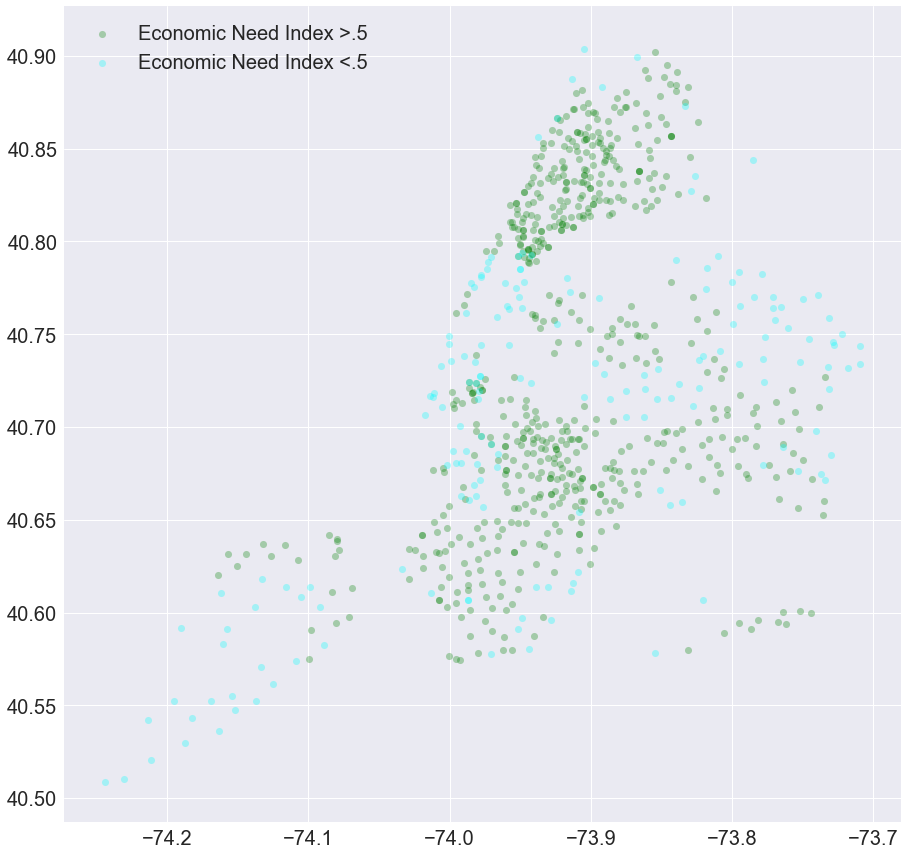

In [51]:
# Not as detailed, but divides the economic need index into two groups, one above .5 and one below .5 

plt.figure(figsize=(15, 15))
sns.set(font_scale=2)
plt.scatter(df['Longitude'][df['Economic Need Index']>.5], df['Latitude'][df['Economic Need Index']>.5], s=50, alpha=0.3, color='g', lw=0,label='Economic Need Index >.5')

plt.scatter(df['Longitude'][df['Economic Need Index']<.5], df['Latitude'][df['Economic Need Index']<.5], s=50, alpha=0.3, color=[0.0,1.0,1.0], lw=0,label='Economic Need Index <.5')
plt.legend(loc='upper left')
plt.show();

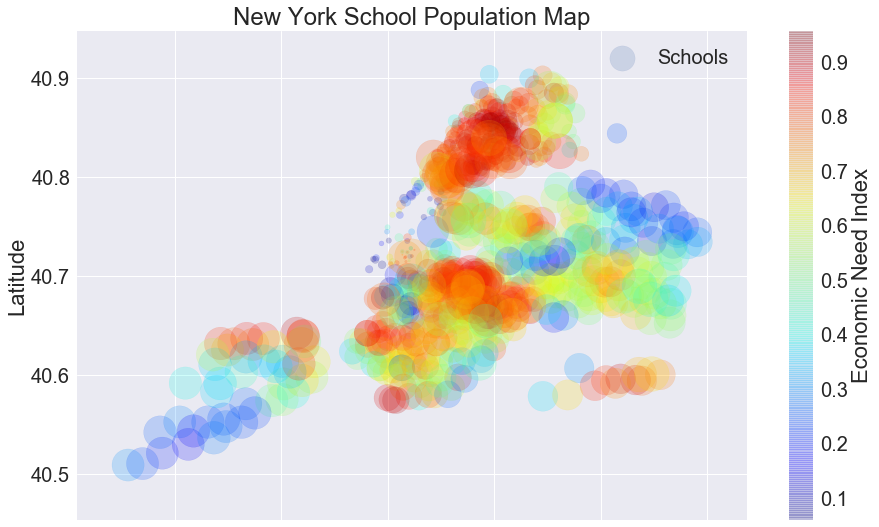

In [52]:
# Adaptable

df.plot(kind="scatter", x="Longitude", y="Latitude",s=df['School Name'].index, c="Economic Need Index", 
        cmap=plt.get_cmap("jet"),label='Schools', title='New York School Population Map',
    colorbar=True, alpha=.2, figsize=(15,9))
plt.legend()
plt.show()

In [53]:
# Economic Need Estimate Heatmap 

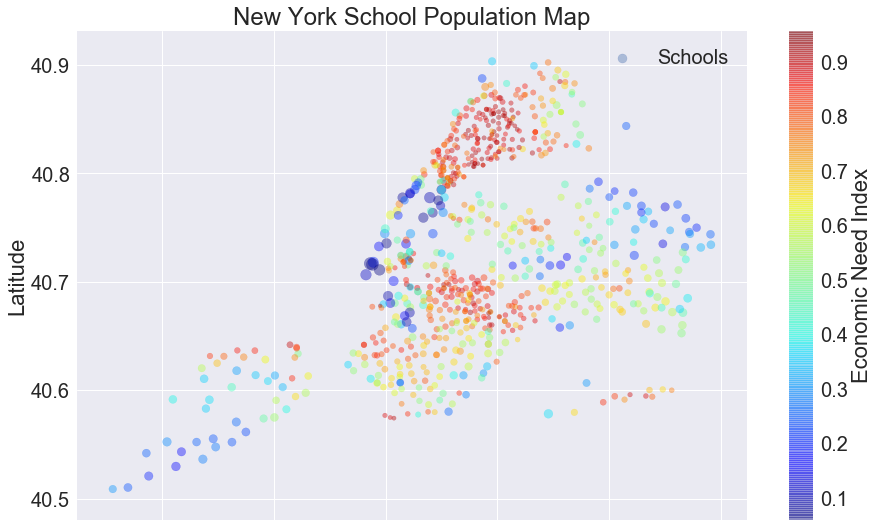

In [54]:
# Solution shared by Classmate, Kiros
df['School Income Estimate'] = df['School Income Estimate'].str.replace(',', '')
df['School Income Estimate'] = df['School Income Estimate'].str.replace('$', '')
df['School Income Estimate'] = df['School Income Estimate'].str.replace(' ', '')
df['School Income Estimate'] = df['School Income Estimate'].astype(float)
df.plot(kind="scatter", x="Longitude", y="Latitude",s=df['School Income Estimate']/1210, c="Economic Need Index", 
        cmap=plt.get_cmap("jet"),label='Schools', title='New York School Population Map',
    colorbar=True, alpha=0.4, figsize=(15,9))
plt.legend()
plt.show();

In [55]:
df['Community School?'].value_counts()

0    767
1     28
Name: Community School?, dtype: int64

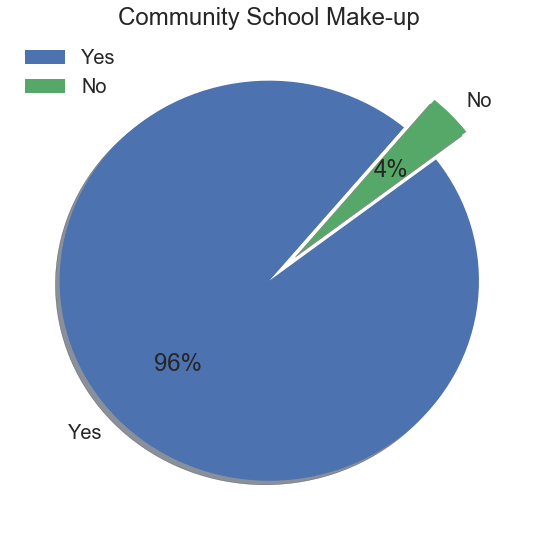

In [56]:
# Community School Make-up
values=[1,0]
labels = ['Yes', 'No']

df['Community School?'].value_counts().plot.pie(figsize=[8,8],explode = [0,.2], startangle=50,
                                                     autopct = "%.0f%%", shadow=True,
                                                     wedgeprops = {"linewidth":.5},labels=labels)
plt.title('Community School Make-up')
plt.ylabel('')
plt.tight_layout()
plt.legend();

In [57]:
boolean = {'Not Meeting Target': 1, 'Approaching Target': 2,'Meeting Target':3,
           'Exceeding Target':4}
df['Student Achievement Rating'] = df['Student Achievement Rating'].map(boolean)
df['Trust Rating'] = df['Trust Rating'].map(boolean)
df['Rigorous Instruction Rating'] = df['Rigorous Instruction Rating'].map(boolean)
df['Collaborative Teachers Rating']=df['Collaborative Teachers Rating'].map(boolean)
df['Supportive Environment Rating']=df['Supportive Environment Rating'].map(boolean)
df['Effective School Leadership Rating']=df['Effective School Leadership Rating'].map(boolean)
df['Strong Family-Community Ties Rating']=df['Strong Family-Community Ties Rating'].map(boolean)

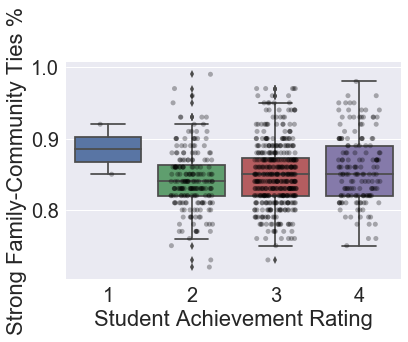

In [58]:
y=df['Strong Family-Community Ties %']
x=df['Student Achievement Rating']
sns.boxplot(x, y)

sns.stripplot(x,y, jitter=.25, alpha=.30, color='black');

In [59]:
# The graph above indicates that there is a slightly positive correlation between Family-Community Ties
# and Student Achievement Rating, seeing as though the schools that received a 4 rating have a higher average community
# ties. 
# The schools that received a 1 for student achievement rating appear to have a stronger correlation, but 
# this is not really the case because (as seen through the overlayed strip-plot), there are only two
# schools that fall under that category so there is not enough data to confidently conclude that the correlation is
# present.  

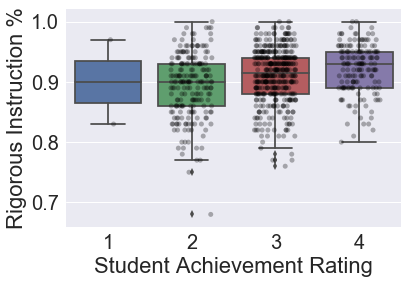

In [60]:
x=df['Student Achievement Rating']
y=df['Rigorous Instruction %']

sns.boxplot(x, y)
sns.stripplot(x,y, jitter=.25, alpha=.30, color='black');


In [61]:
# The graph above indicates that there is a slightly positive correlation between the level of rigor in instruction
# and Student Achievement Rating, seeing as though the schools that received a 4 rating have a higher average rigor
# instruction.
# The schools that received a 1 for student achievement rating appear to have a stronger correlation, but 
# this is not really the case because (as seen through the overlayed strip-plot), there are only two
# schools that fall under that category so there is not enough data to confidently conclude that the correlation is
# present.  

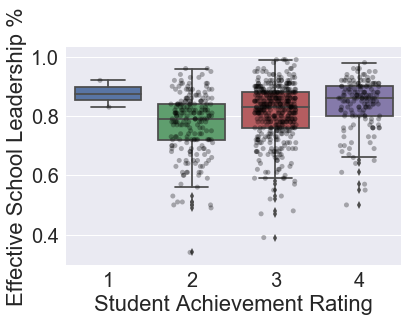

In [62]:
x=df['Student Achievement Rating']
y=df['Effective School Leadership %']

sns.boxplot(x, y)
plt.style.use('presentation')

sns.stripplot(x,y, jitter=.25, alpha=.30, color='black');

In [63]:
# The graph above indicates that there is a slightly positive correlation between the effectiveness of school
# leadership and Student Achievement Rating, seeing as though the schools that received a 4 rating have a higher 
# average effective school rating. 
# The schools that received a 1 for student achievement rating appear to have a stronger correlation, but 
# this is not really the case because (as seen through the overlayed strip-plot), there are only two
# schools that fall under that category so there is not enough data to confidently conclude that the correlation is
# present.  

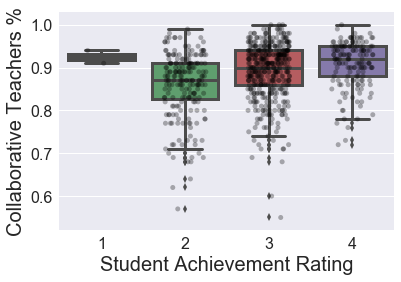

In [64]:
x=df['Student Achievement Rating']
y=df['Collaborative Teachers %']

sns.boxplot(x, y)
plt.style.use('presentation')

sns.stripplot(x,y, jitter=.25, alpha=.30, color='black');

In [65]:
# The graph above indicates that there is a positive correlation between collaborative teaching 
# and Student Achievement Rating, seeing as though the schools that received a 4 rating have a higher average
# collobarative teacher score. 
# The schools that received a 1 for student achievement rating appear to have a stronger correlation, but 
# this is not really the case because (as seen through the overlayed strip-plot), there are only two
# schools that fall under that category so there is not enough data to confidently conclude that the correlation is
# present.  

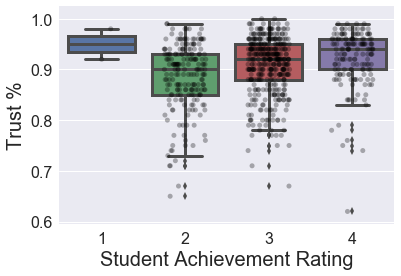

In [66]:
x=df['Student Achievement Rating']
y=df['Trust %']

sns.boxplot(x, y)
sns.stripplot(x,y, jitter=.25, alpha=.30, color='black');

In [67]:
# The graph above indicates that there is a slightly positive correlation between the level of trust in schools
# and Student Achievement Rating, seeing as though the schools that received a 4 rating have a higher average trust 
# level. 
# The schools that received a 1 for student achievement rating appear to have a stronger correlation, but 
# this is not really the case because (as seen through the overlayed strip-plot), there are only two
# schools that fall under that category so there is not enough data to confidently conclude that the correlation is
# present.  

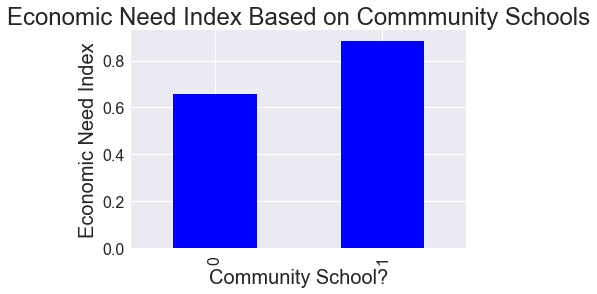

In [68]:
comm= df.groupby('Community School?')['Economic Need Index'].mean()
comm.plot(kind='bar', color='blue')
plt.xlabel('Community School?')
plt.ylabel('Economic Need Index')
plt.title('Economic Need Index Based on Commmunity Schools');

**In the graph above, it is evident that community schools have a higher economic need than non-community schools

In [69]:
# Chronically absent .. Surprisingly, economic need is not very indicative to chronically absent percentage 

In [70]:
chronically_absent = ['School Name', 'Percent of Students Chronically Absent','Percent Black',
                          'Percent Asian', 'Percent Hispanic','Percent White','Economic Need Index']

df[chronically_absent].sort_values('Economic Need Index', ascending = False).head()

,School Name,Percent of Students Chronically Absent,Percent Black,Percent Asian,Percent Hispanic,Percent White,Economic Need Index
202,P.S. 065 MOTHER HALE ACADEMY,0.48,0.32,0.03,0.64,0.01,0.957
764,CHRISTOPHER AVENUE COMMUNITY SCHOOL,0.52,0.69,0.00,0.29,0.01,0.944
264,P.S. 055 BENJAMIN FRANKLIN,0.28,0.47,0.00,0.52,0.00,0.939
456,P.S. 067 CHARLES A. DORSEY,0.36,0.54,0.08,0.35,0.01,0.938
262,P.S. 042 CLAREMONT,0.37,0.41,0.00,0.56,0.02,0.935


In [71]:
# The schools where 100% of the students were chronically absent have a high percent make-up of blacks

In [72]:
df[chronically_absent].sort_values('Percent of Students Chronically Absent',ascending=False).head()

,School Name,Percent of Students Chronically Absent,Percent Black,Percent Asian,Percent Hispanic,Percent White,Economic Need Index
1261,SUCCESS ACADEMY CHARTER SCHOOL - BRONX 2,1.0,0.63,0.01,0.34,0.01,0.794
1260,SUCCESS ACADEMY CHARTER SCHOOL - BRONX 1,1.0,0.56,0.01,0.40,0.01,0.825
1193,SUCCESS ACADEMY CHARTER SCHOOL - HARLEM 1,1.0,0.74,0.01,0.21,0.01,0.712
1196,SUCCESS ACADEMY CHARTER SCHOOL - HARLEM 2,1.0,0.73,0.01,0.23,0.01,0.734
1197,SUCCESS ACADEMY CHARTER SCHOOL - HARLEM 3,1.0,0.61,0.01,0.34,0.02,0.720


In [73]:
# Economic Need Index divided into low and high, high is greater than .75 and low 
# is in the bottom .25 

In [74]:
quant = df['Economic Need Index'].quantile(.75)
quant

0.8490000000000001

In [75]:
median_eni= df['Economic Need Index'].median()
median_eni

0.73

In [76]:
# I'm going to use quantile as my baseline for high economic need because I think it is
# more telling

In [77]:
quant = df['Economic Need Index'].quantile(.75)
df_high_eni = df[df['Economic Need Index'] > quant]
df_low_eni = df[df['Economic Need Index'] < quant]

In [78]:
df_high_eni[['Average ELA Proficiency','Average Math Proficiency']].mean()


Average ELA Proficiency     2.223046
Average Math Proficiency    2.321878
dtype: float64

In [79]:
df_low_eni[['Average ELA Proficiency','Average Math Proficiency']].mean()

Average ELA Proficiency     2.664250
Average Math Proficiency    2.870422
dtype: float64

In [80]:
# The average racial makeup of schools in each city in NY

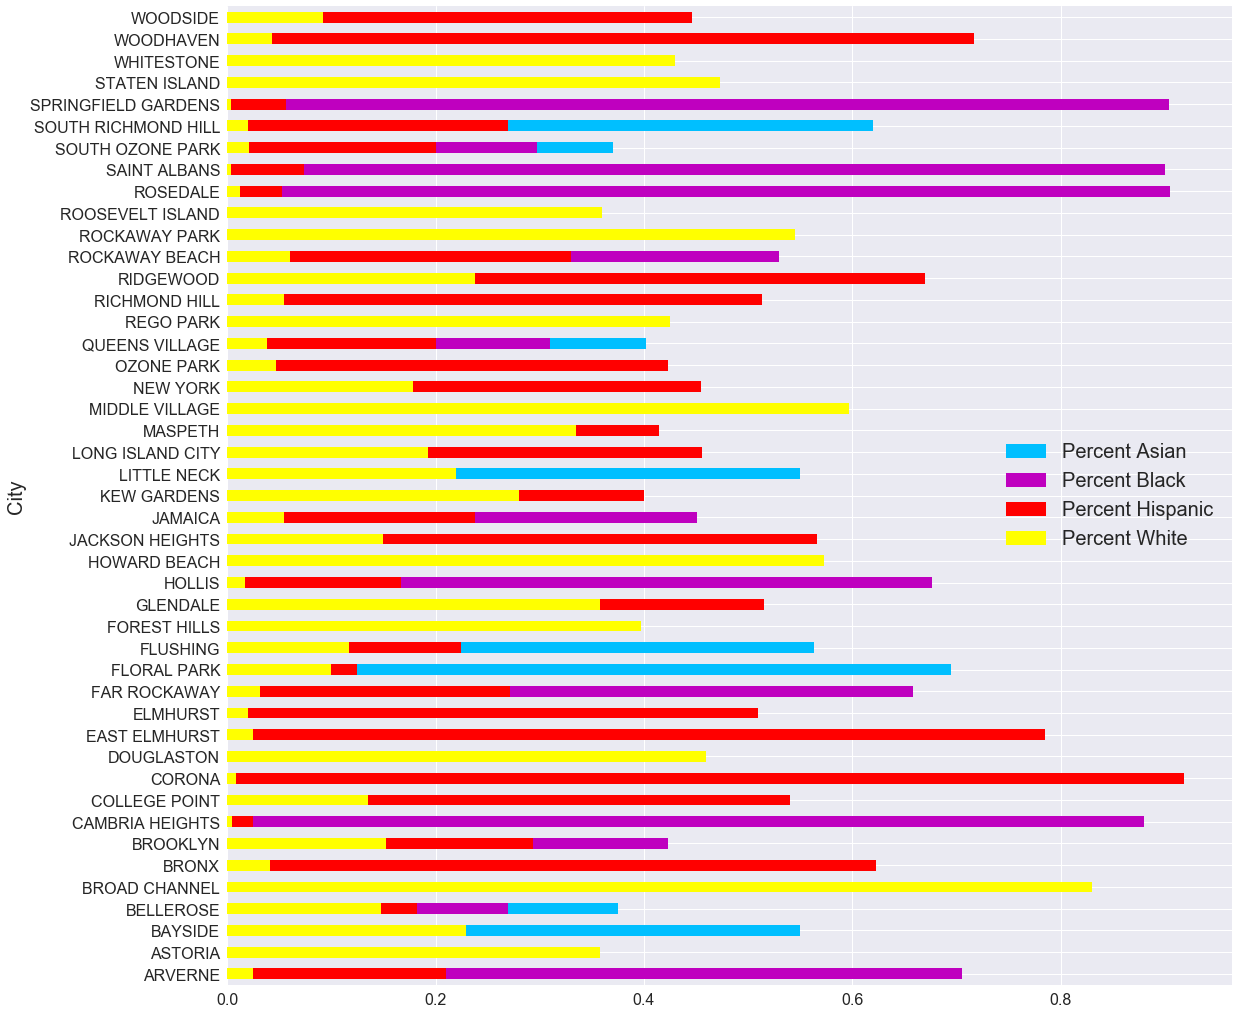

In [81]:
percent= df.groupby('City')['Percent Asian'].mean()
percent.plot(kind='barh',figsize=(18,18),color='deepskyblue')
percent1= df.groupby('City')['Percent Black'].mean()
percent1.plot(kind='barh',figsize=(18,18),color='m')
percent2= df.groupby('City')['Percent Hispanic'].mean()
percent2.plot(kind='barh',figsize=(18,18),color='r')
percent3= df.groupby('City')['Percent White'].mean()
percent3.plot(kind='barh',figsize=(18,18),color='yellow')
plt.legend()
plt.style.use('presentation');

In [82]:
#Finding correlations between significant Race columns

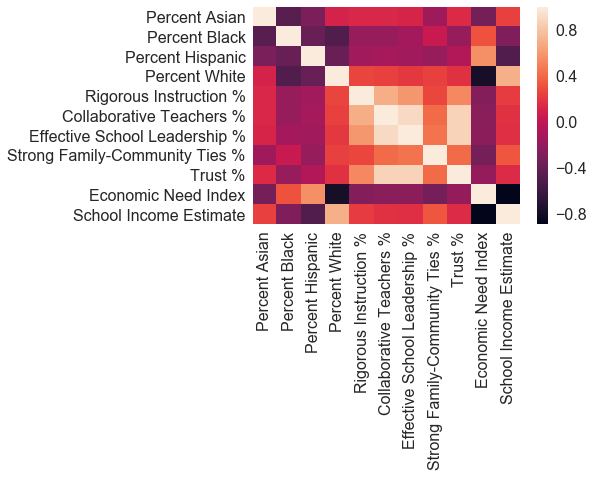

In [83]:
corr_matrix = df[['Percent Asian','Percent Black','Percent Hispanic',
             'Percent White','Rigorous Instruction %','Collaborative Teachers %',
      'Effective School Leadership %','Strong Family-Community Ties %',
             'Trust %','Economic Need Index','School Income Estimate']]
corr1 = corr_matrix.corr()
sns.heatmap(corr1,);

  High Negative Correlations:
    - Percent White and Economic Need Index
    - School Income Estimate and Economic Need Index 
  High Positive Correlations:
    - School Leadership and Collaborative Teachers 
    - Trust and Collaborative Teachers
    - School Leadership and Trust 
    - Colloborative Teachers and Trust

In [84]:
#PICKLE

In [85]:
df.to_pickle('Cleaned_ed.pkl')